In [1]:
import json
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN, GRU, LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.wrappers import TimeDistributed
from keras.layers import Convolution1D, MaxPooling1D
import itertools
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
import os

import progressbar

import tensorflow as tf
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def read_data(rootdir):
    text_l = []
    label_l = []
    for subdir, dirs, files in os.walk(rootdir):
        for fname in files:
            #print os.path.join(subdir, file)
            filepath = subdir + os.sep + fname
            with open(filepath) as f:
                for line1,line2 in itertools.izip_longest(*[f]*2):
                    try:
                        text = ast.literal_eval(line1)
                        label = ast.literal_eval(line2)
                        n_labels = set(label)
                        if len(text) > 3 and len(n_labels) > 1:
                            text_l.append(text)
                            label_l.append(label)
                    except:
                        pass
            f.close()
    return text_l, label_l

In [4]:
X_text, y_text = read_data('../data/input/GO/')

print len(X_text), len(y_text)

text = list(set(itertools.chain(*X_text)))

le = LabelEncoder()
le.fit(text)

w2idx = dict(zip(le.classes_, le.transform(le.classes_)))

idx2w  = {w2idx[k]:k for k in w2idx}

X = []
for each in X_text:
    X.append(le.transform(each))

label = list(set(itertools.chain(*y_text)))

le = LabelEncoder()
le.fit(label)

labels2idx = dict(zip(le.classes_, le.transform(le.classes_)))

idx2la = {labels2idx[k]:k for k in labels2idx}

y = []
for each in y_text:
    y.append(le.transform(each))

print idx2la

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

words_val = [ list(map(lambda x: idx2w[x], w)) for w in X_test]
groundtruth_val = [ list(map(lambda x: idx2la[x], y)) for y in y_test] # y values test
words_train = [ list(map(lambda x: idx2w[x], w)) for w in X_train]
groundtruth_train = [ list(map(lambda x: idx2la[x], y)) for y in y_train] # y values train

n_classes = len(idx2la)
n_vocab = len(idx2w)

1909 1909
{0: 'GO:0000267', 1: 'GO:0000502', 2: 'GO:0000775', 3: 'GO:0000785', 4: 'GO:0000786', 5: 'GO:0000791', 6: 'GO:0000792', 7: 'GO:0000795', 8: 'GO:0000805', 9: 'GO:0000806', 10: 'GO:0000811', 11: 'GO:0001669', 12: 'GO:0001750', 13: 'GO:0001917', 14: 'GO:0005575', 15: 'GO:0005576', 16: 'GO:0005577', 17: 'GO:0005581', 18: 'GO:0005585', 19: 'GO:0005610', 20: 'GO:0005622', 21: 'GO:0005623', 22: 'GO:0005634', 23: 'GO:0005643', 24: 'GO:0005654', 25: 'GO:0005656', 26: 'GO:0005657', 27: 'GO:0005675', 28: 'GO:0005694', 29: 'GO:0005712', 30: 'GO:0005730', 31: 'GO:0005737', 32: 'GO:0005739', 33: 'GO:0005764', 34: 'GO:0005768', 35: 'GO:0005773', 36: 'GO:0005776', 37: 'GO:0005777', 38: 'GO:0005783', 39: 'GO:0005792', 40: 'GO:0005813', 41: 'GO:0005819', 42: 'GO:0005829', 43: 'GO:0005833', 44: 'GO:0005835', 45: 'GO:0005840', 46: 'GO:0005856', 47: 'GO:0005871', 48: 'GO:0005874', 49: 'GO:0005883', 50: 'GO:0005886', 51: 'GO:0005901', 52: 'GO:0005902', 53: 'GO:0005912', 54: 'GO:0005929', 55: 'GO:0

In [5]:
print le.classes_

['GO:0000267' 'GO:0000502' 'GO:0000775' 'GO:0000785' 'GO:0000786'
 'GO:0000791' 'GO:0000792' 'GO:0000795' 'GO:0000805' 'GO:0000806'
 'GO:0000811' 'GO:0001669' 'GO:0001750' 'GO:0001917' 'GO:0005575'
 'GO:0005576' 'GO:0005577' 'GO:0005581' 'GO:0005585' 'GO:0005610'
 'GO:0005622' 'GO:0005623' 'GO:0005634' 'GO:0005643' 'GO:0005654'
 'GO:0005656' 'GO:0005657' 'GO:0005675' 'GO:0005694' 'GO:0005712'
 'GO:0005730' 'GO:0005737' 'GO:0005739' 'GO:0005764' 'GO:0005768'
 'GO:0005773' 'GO:0005776' 'GO:0005777' 'GO:0005783' 'GO:0005792'
 'GO:0005813' 'GO:0005819' 'GO:0005829' 'GO:0005833' 'GO:0005835'
 'GO:0005840' 'GO:0005856' 'GO:0005871' 'GO:0005874' 'GO:0005883'
 'GO:0005886' 'GO:0005901' 'GO:0005902' 'GO:0005912' 'GO:0005929'
 'GO:0005966' 'GO:0008091' 'GO:0008305' 'GO:0009986' 'GO:0010369'
 'GO:0014069' 'GO:0016020' 'GO:0016021' 'GO:0016028' 'GO:0016234'
 'GO:0016459' 'GO:0016528' 'GO:0017086' 'GO:0019814' 'GO:0030016'
 'GO:0030054' 'GO:0030056' 'GO:0030286' 'GO:0030424' 'GO:0030425'
 'GO:00308

In [6]:
print("Example sentence : {}".format(words_train[0]))
print("Encoded form: {}".format(X_train[0]))
print 
print("It's label : {}".format(groundtruth_train[0]))
print("Encoded form: {}".format(y_train[0]))

Example sentence : ['As', 'judged', 'by', 'immunofluorescence', 'with', 'antibodies', 'against', 'the', 'proliferating', 'nuclear', 'antigen', 'Ki67', 'the', 'timing', 'of', 'Snail', 'expression', 'coincided', 'with', 'the', 'stage', 'at', 'which', 'the', 'developing', 'follicle', 'enhanced', 'its', 'proliferation', 'and', 'downgrowth', 'Figure', '1F', 'Immunohistochemistry', 'with', 'antibodies', 'against', 'the', 'active', 'phosphorylated', 'form', 'of', 'MAPK', 'pMAPK', 'marked', 'a', 'subset', 'of', 'the', 'proliferating', 'Ki67positive', 'cells', 'and', 'pMAPKpositive', 'cells', 'were', 'enriched', 'in', 'the', 'hair', 'bud', 'Figure', '1G', 'The', 'timing', 'of', 'Snail', 'induction', 'and', 'Ki67', 'and', 'pMAPK', 'enrichment', 'in', 'the', 'hair', 'bud', 'appeared', 'to', 'follow', 'closely', 'the', 'induction', 'of', 'LEF1\xce\xb2catenin', 'activity', 'known', 'to', 'initiate', 'in', 'the', 'hair', 'placode', 'stage']
Encoded form: [ 1732 11739  8256 11289 16503  7615  7321 15

## RNN Based

In [7]:
model = Sequential()
model.add(Embedding(n_vocab,100))
model.add(Dropout(0.25))
model.add(SimpleRNN(200,return_sequences=True))
model.add(TimeDistributed(Dense(n_classes, activation='softmax')))
model.compile('rmsprop', 'categorical_crossentropy')

In [8]:
### Training
n_epochs = 10

train_loss = []
val_loss = []

for i in range(n_epochs):
    print("Epoch {}".format(i))
    
    print("Training =>")
    train_pred_label = []
    avgLoss = 0


    bar = progressbar.ProgressBar(maxval=len(X_train))
    for n_batch, sent in bar(enumerate(X_train)):
        label = y_train[n_batch]
        label = np.eye(n_classes)[label][np.newaxis,:]
        sent = sent[np.newaxis,:]

        if sent.shape[1] > 1: #some bug in keras
            loss = model.train_on_batch(sent, label)
            avgLoss += loss

        pred = model.predict_on_batch(sent)
        pred = np.argmax(pred,-1)[0]
        train_pred_label.append(pred)

    avgLoss = avgLoss/n_batch
    train_loss.append(avgLoss)
    
    
    predword_train = [ list(map(lambda x: idx2la[x], y)) for y in train_pred_label]
    
    print("Validating =>")
    
    val_pred_label = []
    avgLoss = 0
    
    bar = progressbar.ProgressBar(maxval=len(X_test))
    for n_batch, sent in bar(enumerate(X_test)):
        label = y_test[n_batch]
        label = np.eye(n_classes)[label][np.newaxis,:]
        sent = sent[np.newaxis,:]
        
        if sent.shape[1] > 1: #some bug in keras
            loss = model.test_on_batch(sent, label)
            avgLoss += loss

        pred = model.predict_on_batch(sent)
        pred = np.argmax(pred,-1)[0]
        val_pred_label.append(pred)

    avgLoss = avgLoss/n_batch
    val_loss.append(avgLoss)
    predword_val = [ list(map(lambda x: idx2la[x], y)) for y in val_pred_label]



Epoch 0
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 1
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 2
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 3
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 4
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 5
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 6
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 7
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 8
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 9
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


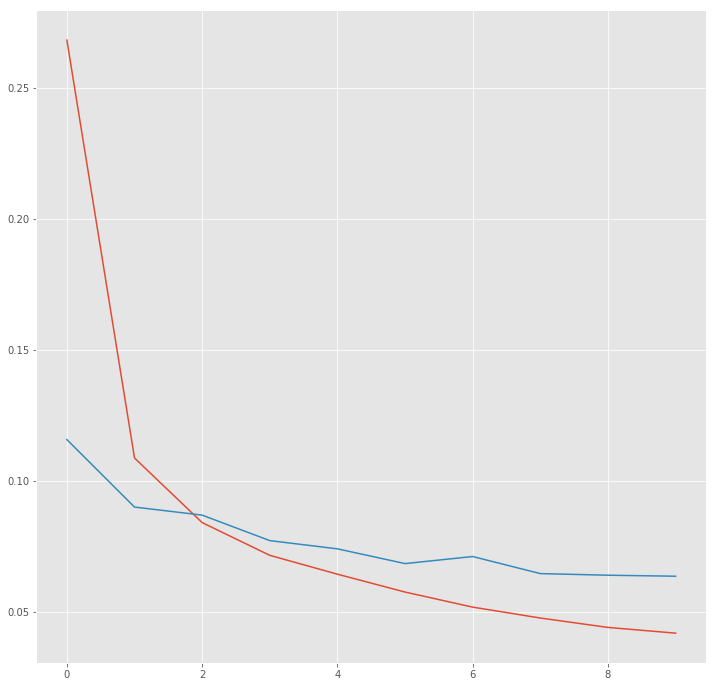

In [9]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.show()

In [10]:
print classification_report(list(itertools.chain.from_iterable(groundtruth_val)), 
                            list(itertools.chain.from_iterable(predword_val)))

             precision    recall  f1-score   support

 GO:0000267       0.00      0.00      0.00         7
 GO:0000775       0.00      0.00      0.00         4
 GO:0000785       0.95      0.91      0.93        22
 GO:0000786       0.00      0.00      0.00         7
 GO:0000791       0.00      0.00      0.00         3
 GO:0000792       1.00      0.91      0.95        11
 GO:0000795       0.00      0.00      0.00         5
 GO:0000805       0.33      0.67      0.44         3
 GO:0000806       0.00      0.00      0.00         1
 GO:0000811       0.00      0.00      0.00         1
 GO:0001750       0.00      0.00      0.00         2
 GO:0001917       0.00      0.00      0.00        10
 GO:0005575       0.00      0.00      0.00         3
 GO:0005576       0.00      0.00      0.00         6
 GO:0005577       0.00      0.00      0.00         3
 GO:0005581       0.50      0.62      0.56         8
 GO:0005585       0.00      0.00      0.00         2
 GO:0005610       0.00      0.00      0.00   

/home/sdmohant/.virtualenvs/deeplearn/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
import pandas as pd

df1 = pd.DataFrame(
{
    'Predicted' : list(itertools.chain.from_iterable(predword_val)),
    'Ground Truth': list(itertools.chain.from_iterable(groundtruth_val))
}
)

In [12]:
df1.to_csv('../data/results/RNN_Based.tsv', sep='\t')

In [13]:
%run ./accuracy/src/computeSim.py ../data/results/RNN_Based.tsv ../data/validation_data/GO_AllSubsumers.tsv

Mean semantic similarity:  0.849


## GRU Based

In [14]:
print('Build model...')
model = Sequential()
model.add(Embedding(n_vocab,100))
model.add(Convolution1D(64,5,border_mode='same', activation='relu'))
model.add(Dropout(0.25))
model.add(GRU(200,return_sequences=True))
model.add(TimeDistributed(Dense(n_classes, activation='softmax')))
model.compile('rmsprop', 'categorical_crossentropy')

Build model...


/home/sdmohant/.virtualenvs/deeplearn/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 5, padding="same", activation="relu")`
  after removing the cwd from sys.path.


In [ ]:
### Training
n_epochs = 50

train_f_scores = []
val_f_scores = []
best_val_f1 = 0

for i in range(n_epochs):
    print("Epoch {}".format(i))
    
    print("Training =>")
    train_pred_label = []
    avgLoss = 0


    bar = progressbar.ProgressBar(maxval=len(X_train))
    for n_batch, sent in bar(enumerate(X_train)):
        label = y_train[n_batch]
        label = np.eye(n_classes)[label][np.newaxis,:]
        sent = sent[np.newaxis,:]

        if sent.shape[1] > 1: #some bug in keras
            loss = model.train_on_batch(sent, label)
            avgLoss += loss

        pred = model.predict_on_batch(sent)
        pred = np.argmax(pred,-1)[0]
        train_pred_label.append(pred)

    avgLoss = avgLoss/n_batch
    
    predword_train = [ list(map(lambda x: idx2la[x], y)) for y in train_pred_label]
    
    
    print("Validating =>")
    
    val_pred_label = []
    avgLoss = 0
    
    bar = progressbar.ProgressBar(maxval=len(X_test))
    for n_batch, sent in bar(enumerate(X_test)):
        label = y_test[n_batch]
        label = np.eye(n_classes)[label][np.newaxis,:]
        sent = sent[np.newaxis,:]
        
        if sent.shape[1] > 1: #some bug in keras
            loss = model.test_on_batch(sent, label)
            avgLoss += loss

        pred = model.predict_on_batch(sent)
        pred = np.argmax(pred,-1)[0]
        val_pred_label.append(pred)

    avgLoss = avgLoss/n_batch
    
    predword_val = [ list(map(lambda x: idx2la[x], y)) for y in val_pred_label]

print classification_report(list(itertools.chain.from_iterable(groundtruth_val)), 
                            list(itertools.chain.from_iterable(predword_val)))

Epoch 0
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 1
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 2
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 3
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 4
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 5
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 6
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 7
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 8
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 9
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 10
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 11
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 12
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 13
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 14
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 15
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 16
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 17
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 18
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 19
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 20
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 21
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 22
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 23
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 24
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 25
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 26
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 27
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 28
Training =>


100% |########################################################################|


Validating =>


100% |########################################################################|


Epoch 29
Training =>


100% |########################################################################|


Validating =>


In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# print groundtruth_val, predword_val

In [ ]:
import pandas as pd

df = pd.DataFrame(
{
    'Predicted' : list(itertools.chain.from_iterable(predword_val)),
    'Ground Truth': list(itertools.chain.from_iterable(groundtruth_val))
}
)

In [ ]:
df.to_csv('../data/results/GRU_Based.tsv', sep='\t')

In [ ]:
%run ./accuracy/src/computeSim.py ../data/results/GRU_Based.tsv ../data/validation_data/GO_AllSubsumers.tsv